<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/EV_Dataset_EDA_and_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df = pd.read_csv('ElectricCarData_Clean.csv')

In [116]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [117]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [119]:
df.corr()

<ipython-input-119-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.175335,-0.627174
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.126470,0.829057
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.300163,0.674844
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.301230,0.396705
Seats,-0.175335,0.126470,0.300163,0.301230,1.000000,0.020920
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.020920,1.000000


<ipython-input-120-9116f7846098>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)


<Axes: >

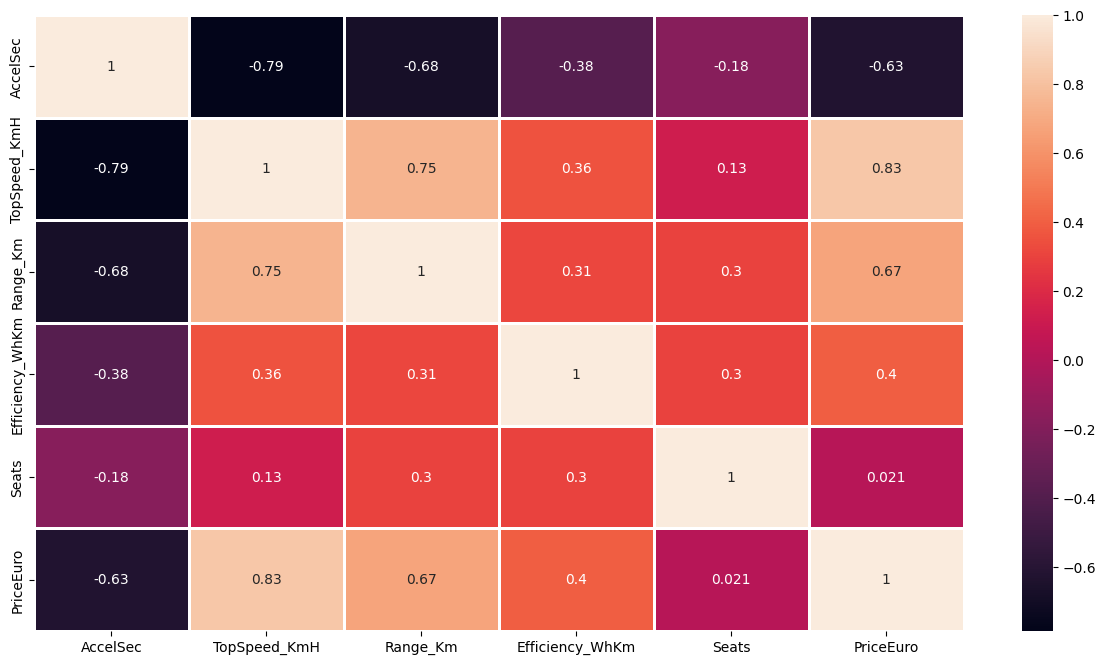

In [120]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

In [121]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

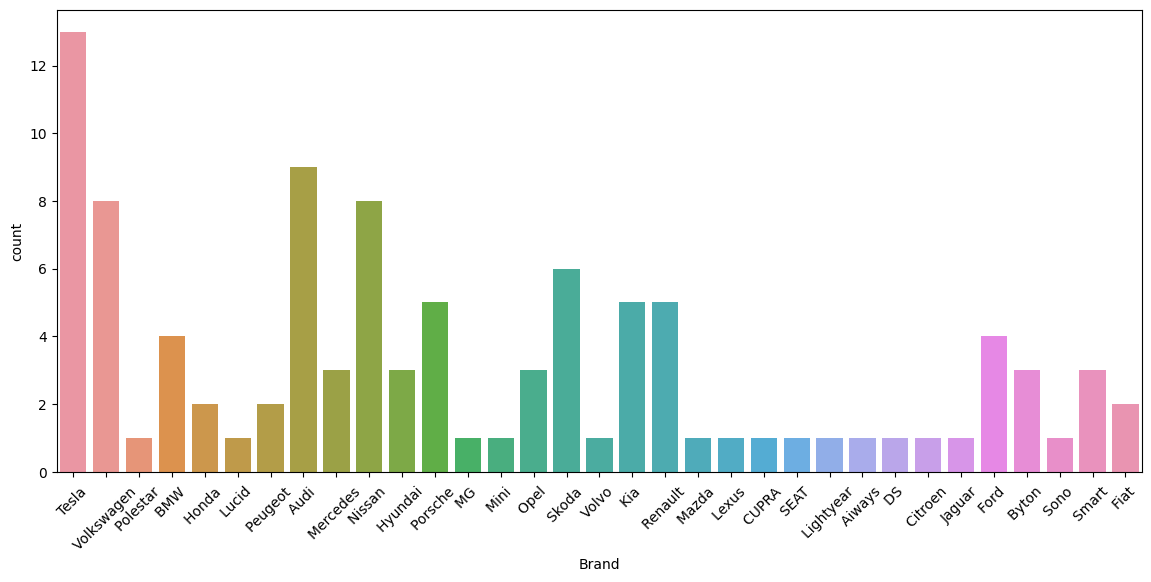

In [122]:
plt.figure(figsize = (14,6))
sns.countplot(x = df['Brand'])
plt.xticks(rotation = 45)
plt.show()

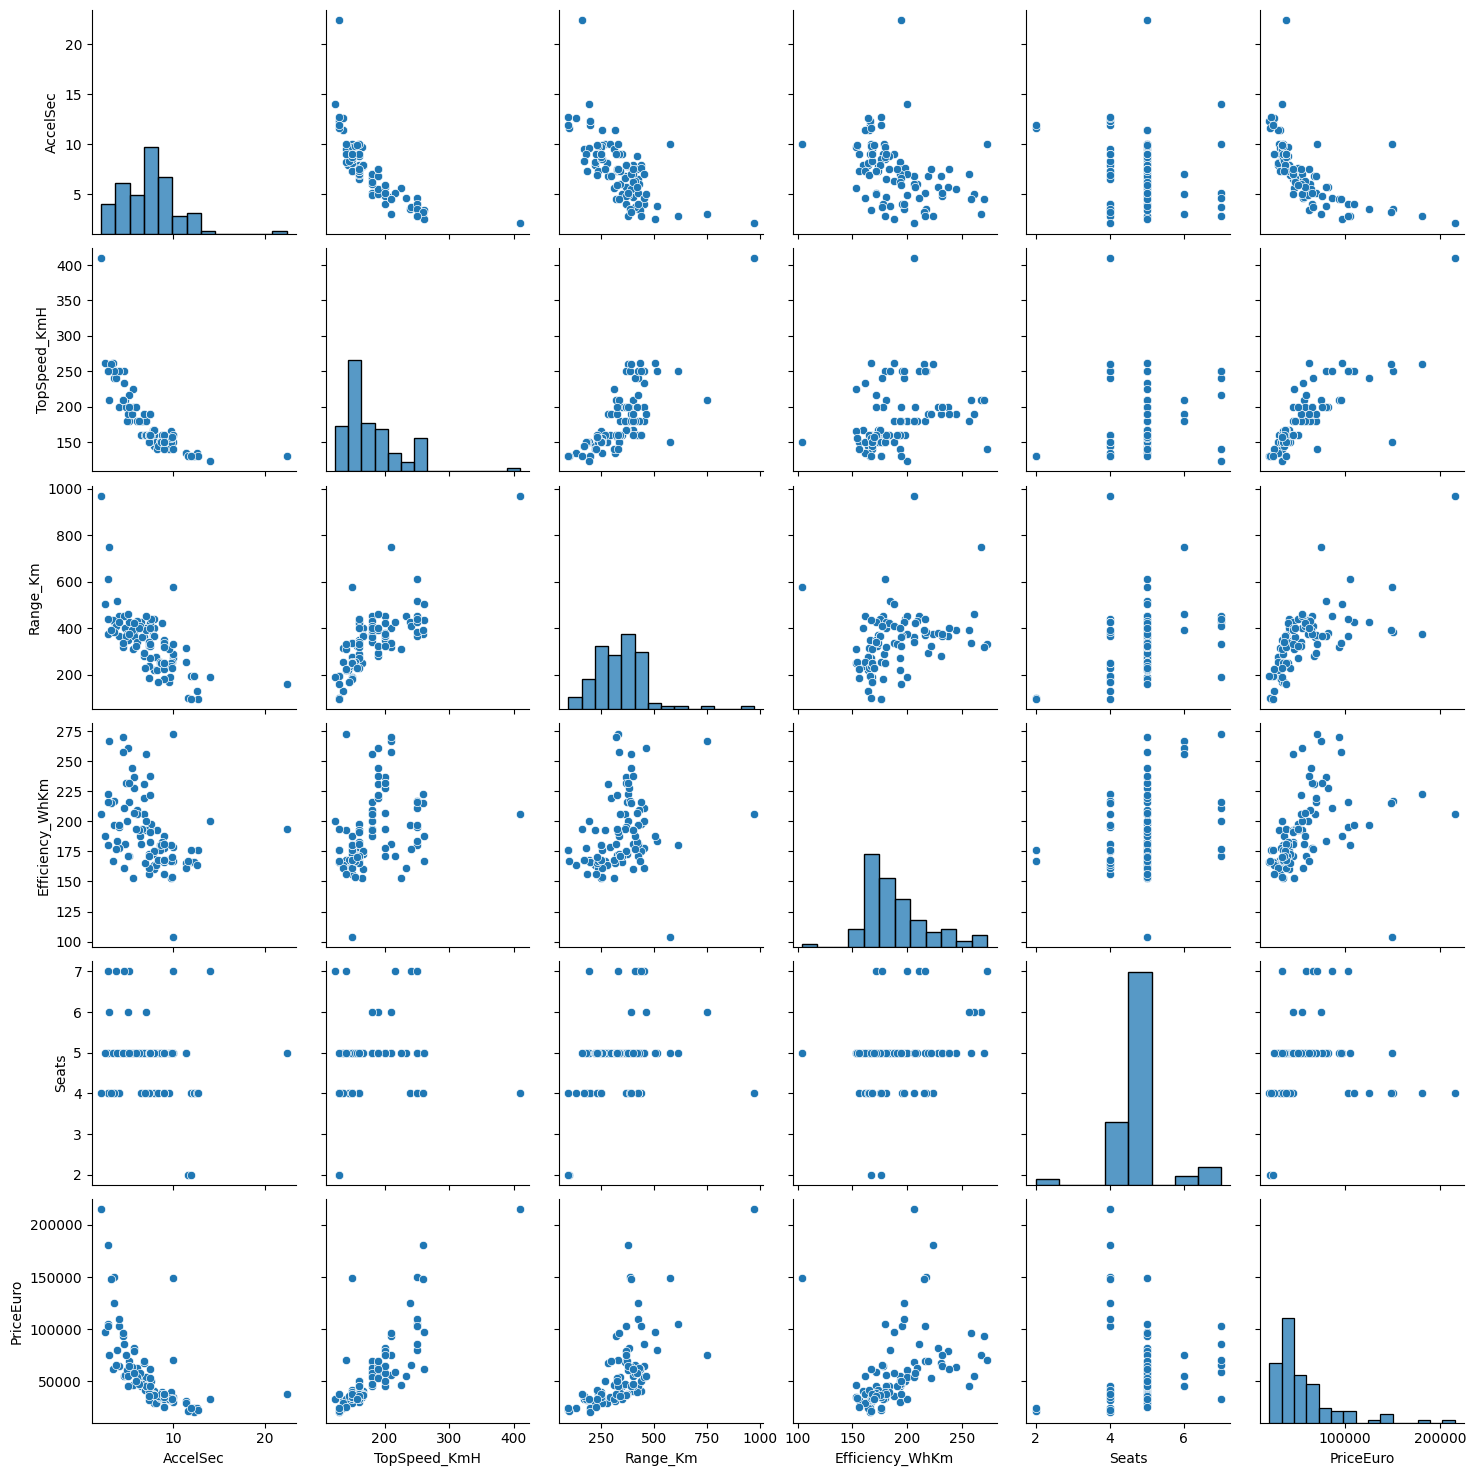

In [123]:
sns.pairplot(df)

In [124]:
Acc = df.groupby('Brand')['AccelSec'].mean()

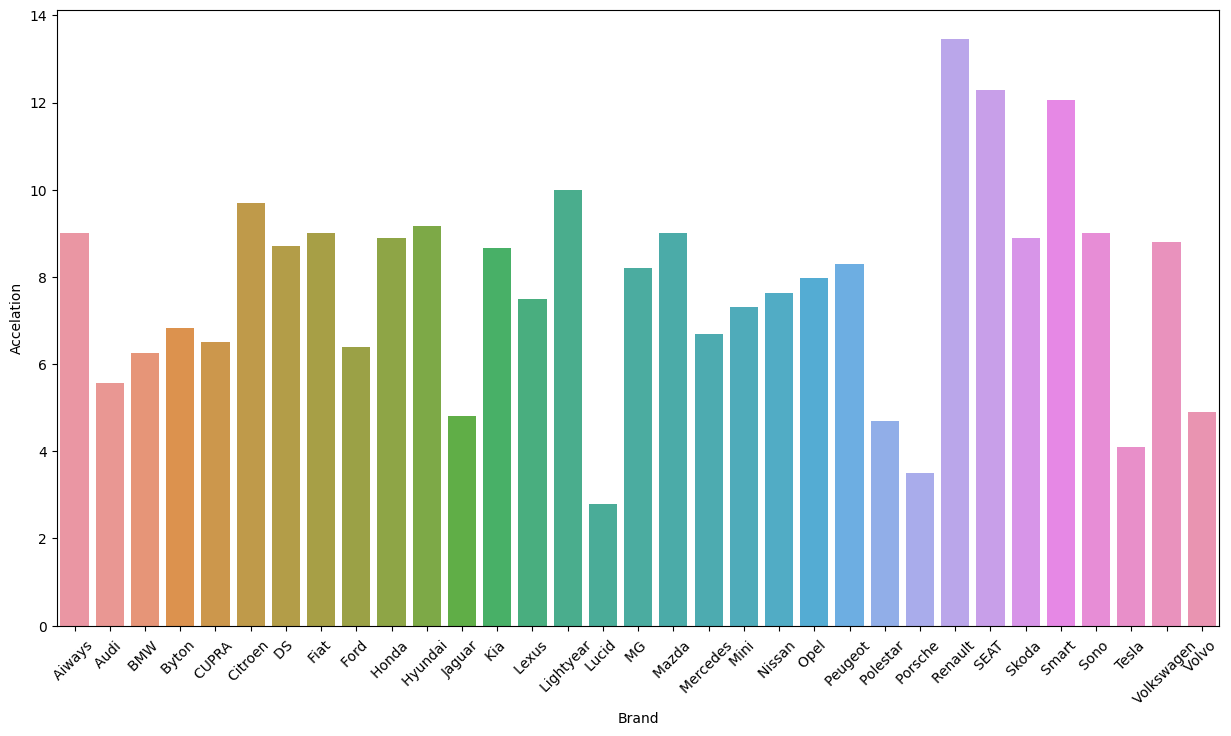

In [125]:
plt.figure(figsize = (15,8))
sns.barplot(x = Acc.index , y = Acc.values)
plt.xticks(rotation = 45)
plt.ylabel('Accelation')
plt.show()

In [126]:
Speed = df.groupby('Brand')['TopSpeed_KmH'].mean()

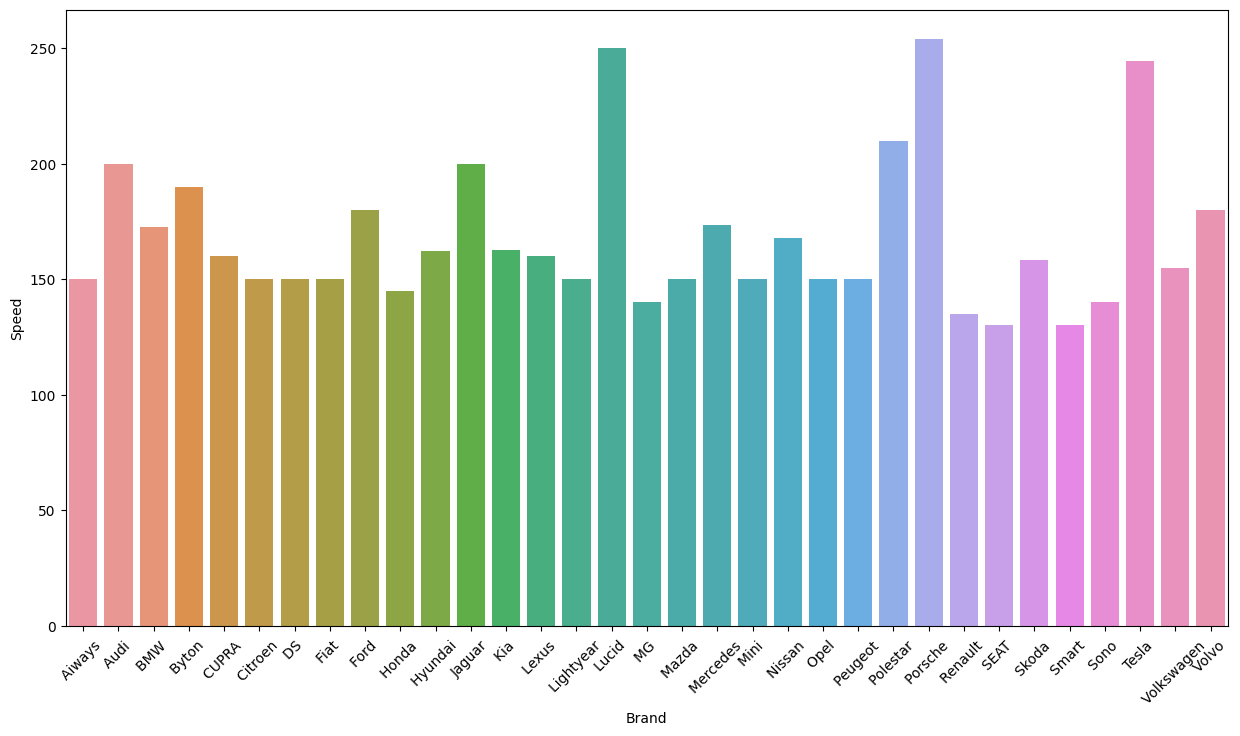

In [127]:
plt.figure(figsize = (15,8))
sns.barplot(x = Speed.index , y = Speed.values)
plt.xticks(rotation = 45)
plt.ylabel('Speed')
plt.show()

In [128]:
Range = df.groupby('Brand')['Range_Km'].mean()

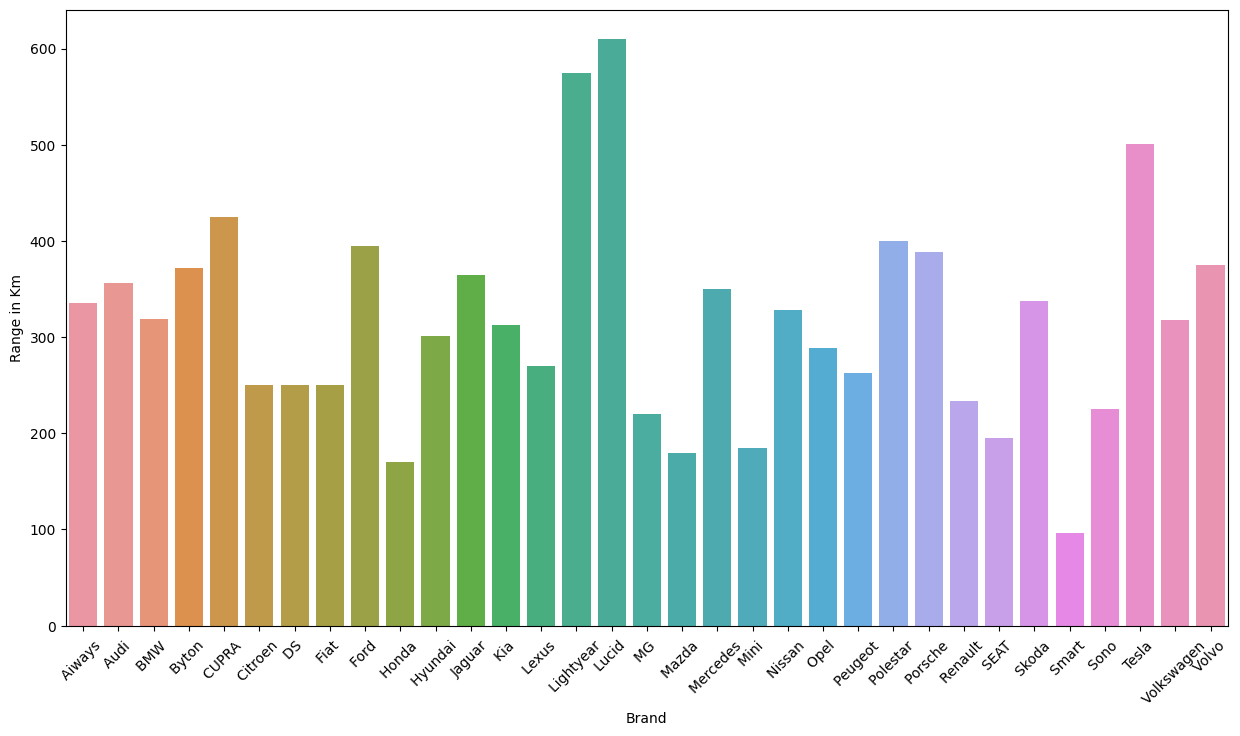

In [129]:
plt.figure(figsize = (15,8))
sns.barplot(x = Range.index , y = Range.values)
plt.xticks(rotation = 45)
plt.ylabel('Range in Km')
plt.show()

In [130]:
Efficiency = df.groupby('Brand')['Efficiency_WhKm'].mean()

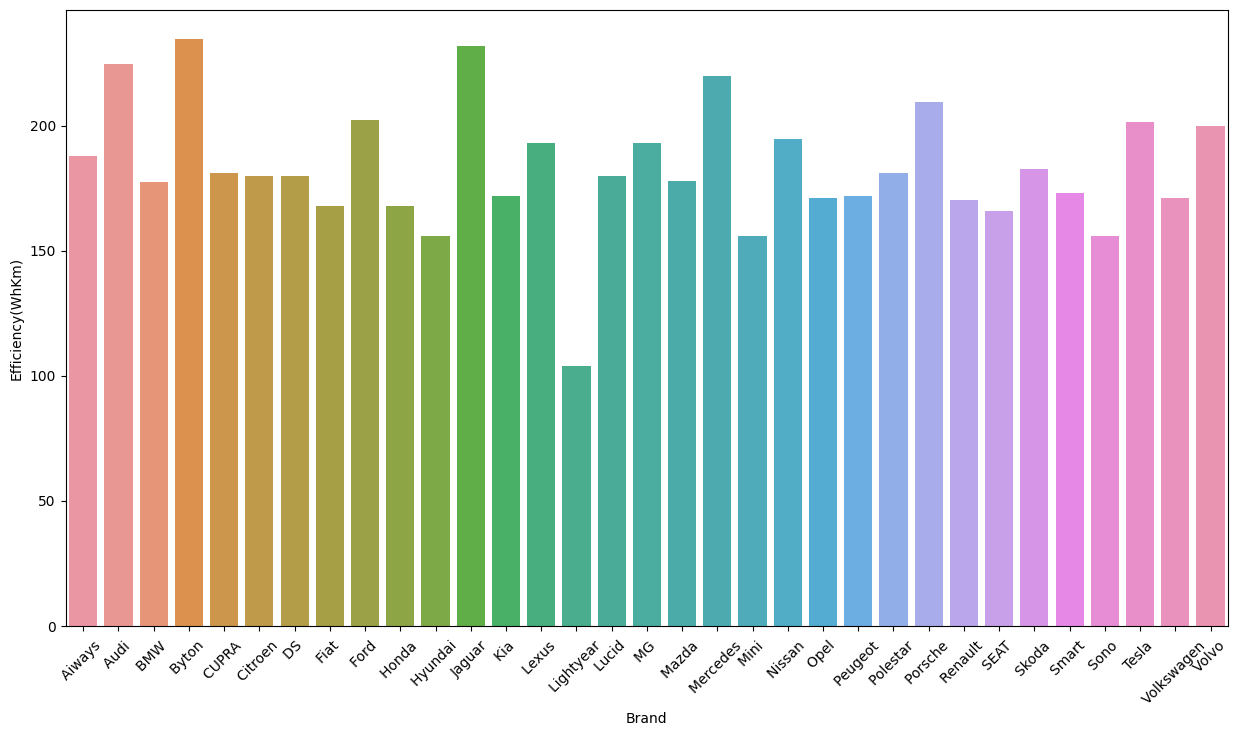

In [131]:
plt.figure(figsize = (15,8))
sns.barplot(x = Efficiency.index , y = Efficiency.values)
plt.xticks(rotation = 45)
plt.ylabel('Efficiency(WhKm)')
plt.show()

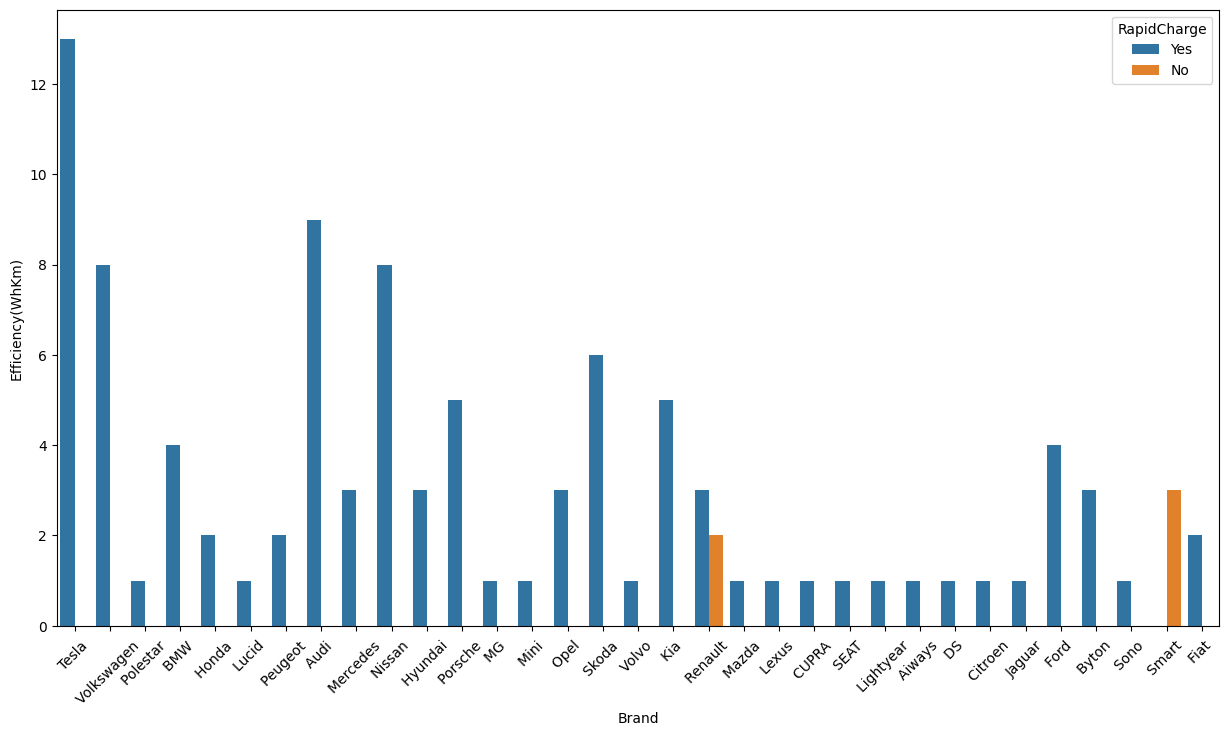

In [132]:
plt.figure(figsize = (15,8))
sns.countplot(x = df['Brand'] , hue = df['RapidCharge'])
plt.xticks(rotation = 45)
plt.ylabel('Efficiency(WhKm)')
plt.show()

In [133]:
df['PowerTrain'].value_counts()

AWD    41
FWD    37
RWD    25
Name: PowerTrain, dtype: int64

<Axes: xlabel='PowerTrain', ylabel='count'>

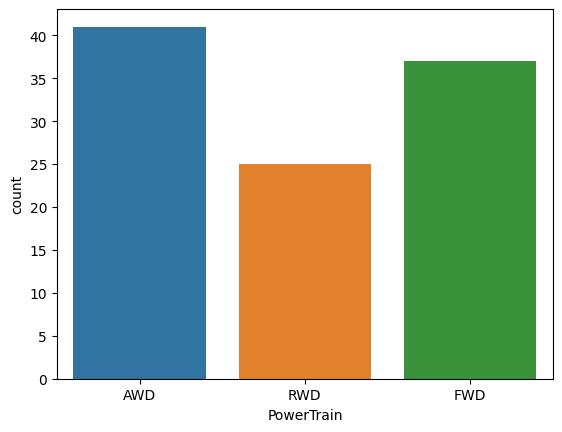

In [134]:
sns.countplot(x = df['PowerTrain'])

<Axes: xlabel='PlugType', ylabel='count'>

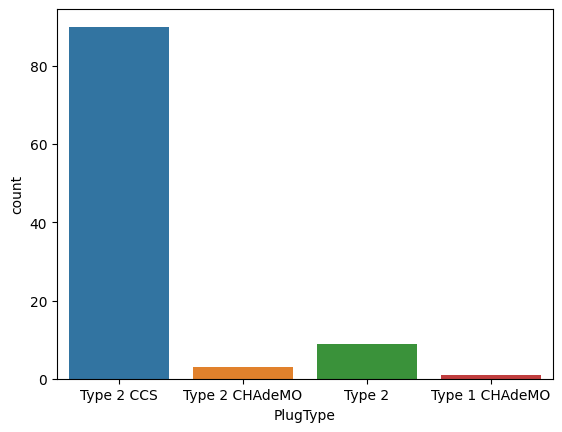

In [135]:
sns.countplot(x = df['PlugType'])

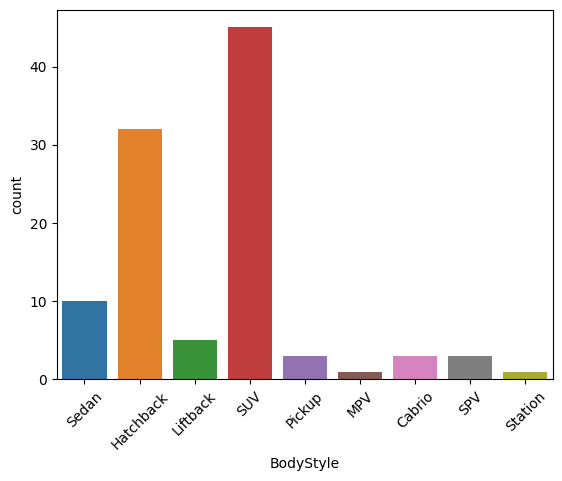

In [136]:
sns.countplot(x = df['BodyStyle'])
plt.xticks(rotation = 45)
plt.show()

Text(0.5, 1.0, 'Body Style')

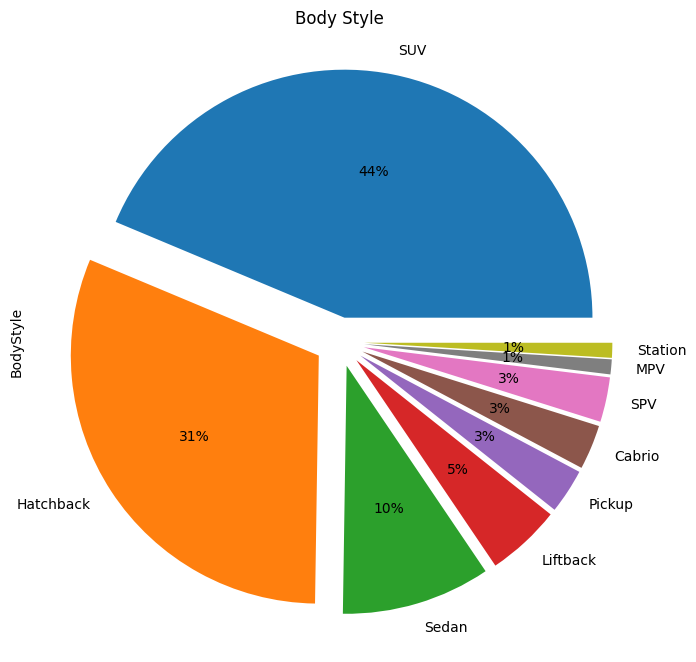

In [137]:
df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

In [138]:
df['Segment'].value_counts()

C    30
B    22
D    15
F    12
E    10
A     7
N     6
S     1
Name: Segment, dtype: int64

Text(0.5, 1.0, 'Segment')

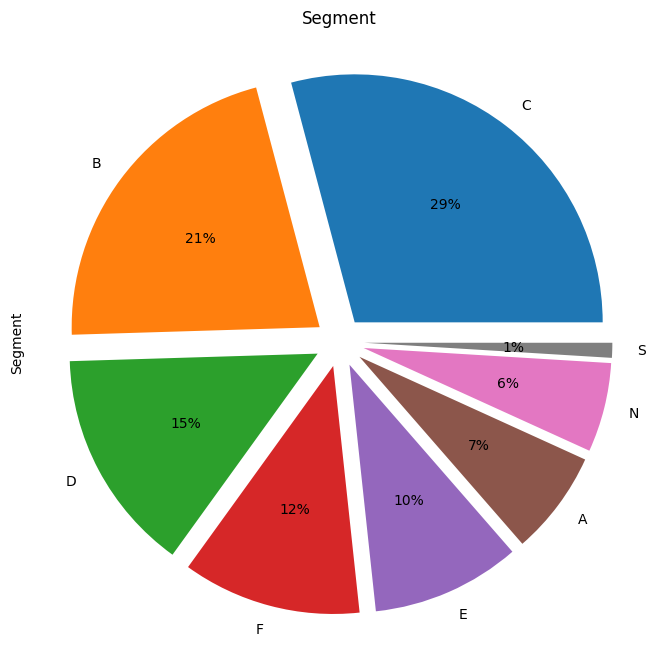

In [139]:
df['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')

<Axes: xlabel='Seats', ylabel='count'>

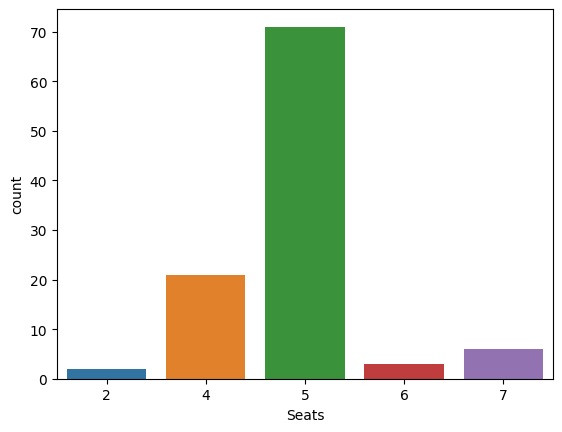

In [140]:
sns.countplot(x = df['Seats'])

Text(0.5, 1.0, 'Seats')

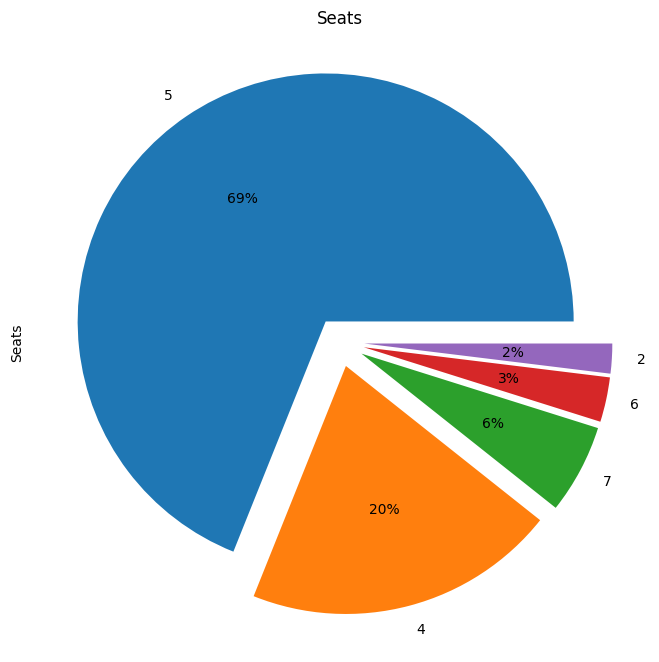

In [141]:
df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

<ipython-input-142-18c031377428>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['PriceEuro'])


Text(0.5, 0, 'Price in Euro')

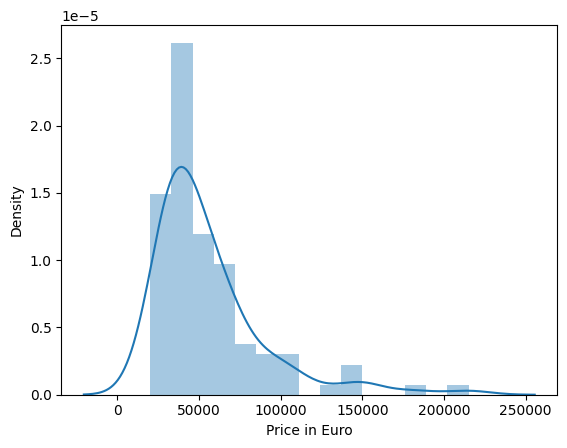

In [142]:
sns.distplot(x = df['PriceEuro'])
plt.xlabel('Price in Euro')

In [143]:
X=df[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm']]
y=df['PriceEuro']

In [144]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size  = 0.3 , random_state = 365)

In [145]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train , y_train)
y_pred = lm.predict(X_test)

In [147]:
from sklearn.metrics import r2_score
r2=(r2_score(y_test,y_pred))
print(r2*100)

78.35225979903609


In [148]:
import statsmodels.api as sm

In [149]:
X= sm.add_constant(X)
results = sm.OLS(y,X)

In [150]:
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     60.28
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           1.37e-25
Time:                        13:21:38   Log-Likelihood:                -1156.8
No. Observations:                 103   AIC:                             2324.
Df Residuals:                      98   BIC:                             2337.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.051e+05    2.3e+04     -4.578      0.000   -1.51e+05   -5.96e+04
AccelSec         1482.2127   1033.219      1.435      0.155    -568.178    3532.603
Range_Km           37.7714     22.680      1.665      0.099      -7.236      82.779
TopSpeed_KmH      613.9243     78.224      7.848      0.000     458.691     769.157
Efficiency_WhKm   143.7166     68.228      2.106      0.038       8.320     279.113
==============================================================================
Omnibus:                       94.859   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1049.593
Skew:                           2.978   Prob(JB):                    1.21e-228
Kurtosis:                      17.460   Cond. No.                     5.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [151]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size  = 0.3 , random_state = 365)

In [152]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train , y_train)
y_pred = lm.predict(X_test)

In [154]:
from sklearn.metrics import r2_score
r2=(r2_score(y_test,y_pred))
print(r2*100)

78.35225979903608


In [155]:
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

In [156]:
y1=df[['RapidCharge']]
X1=df[['PriceEuro']]

In [158]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2,random_state=365)

In [161]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X1_train , y1_train)
y1_pred = lg.predict(X1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [164]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y1_test, y1_pred))

[[ 0  1]
 [ 0 20]]


In [163]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y1_test , y1_pred)*100)

95.23809523809523
